In [16]:
import sys

sys.path.append("..")

In [17]:
from nrc import NoisyRingsClustering
from experiments.datagen import random_circles, random_noise
import numpy as np
import matplotlib.pyplot as plt
from experiments.draw import plot_results
from experiments.colors import get_vibrant_colors
from experiments.utils import save_experiment

INFO:nrc.fuzzycmeans:[FuzzyCMeans] Converged after 7 iterations. Stopping early.
INFO:nrc:[NoisyRingsClustering] Converged partly after 27 iterations. Recomputing noise mask and continuing. Total noise samples are 24.0
INFO:nrc:[NoisyRingsClustering] Converged after 28 iterations. Stopping early.
INFO:nrc:Total noise samples: 24


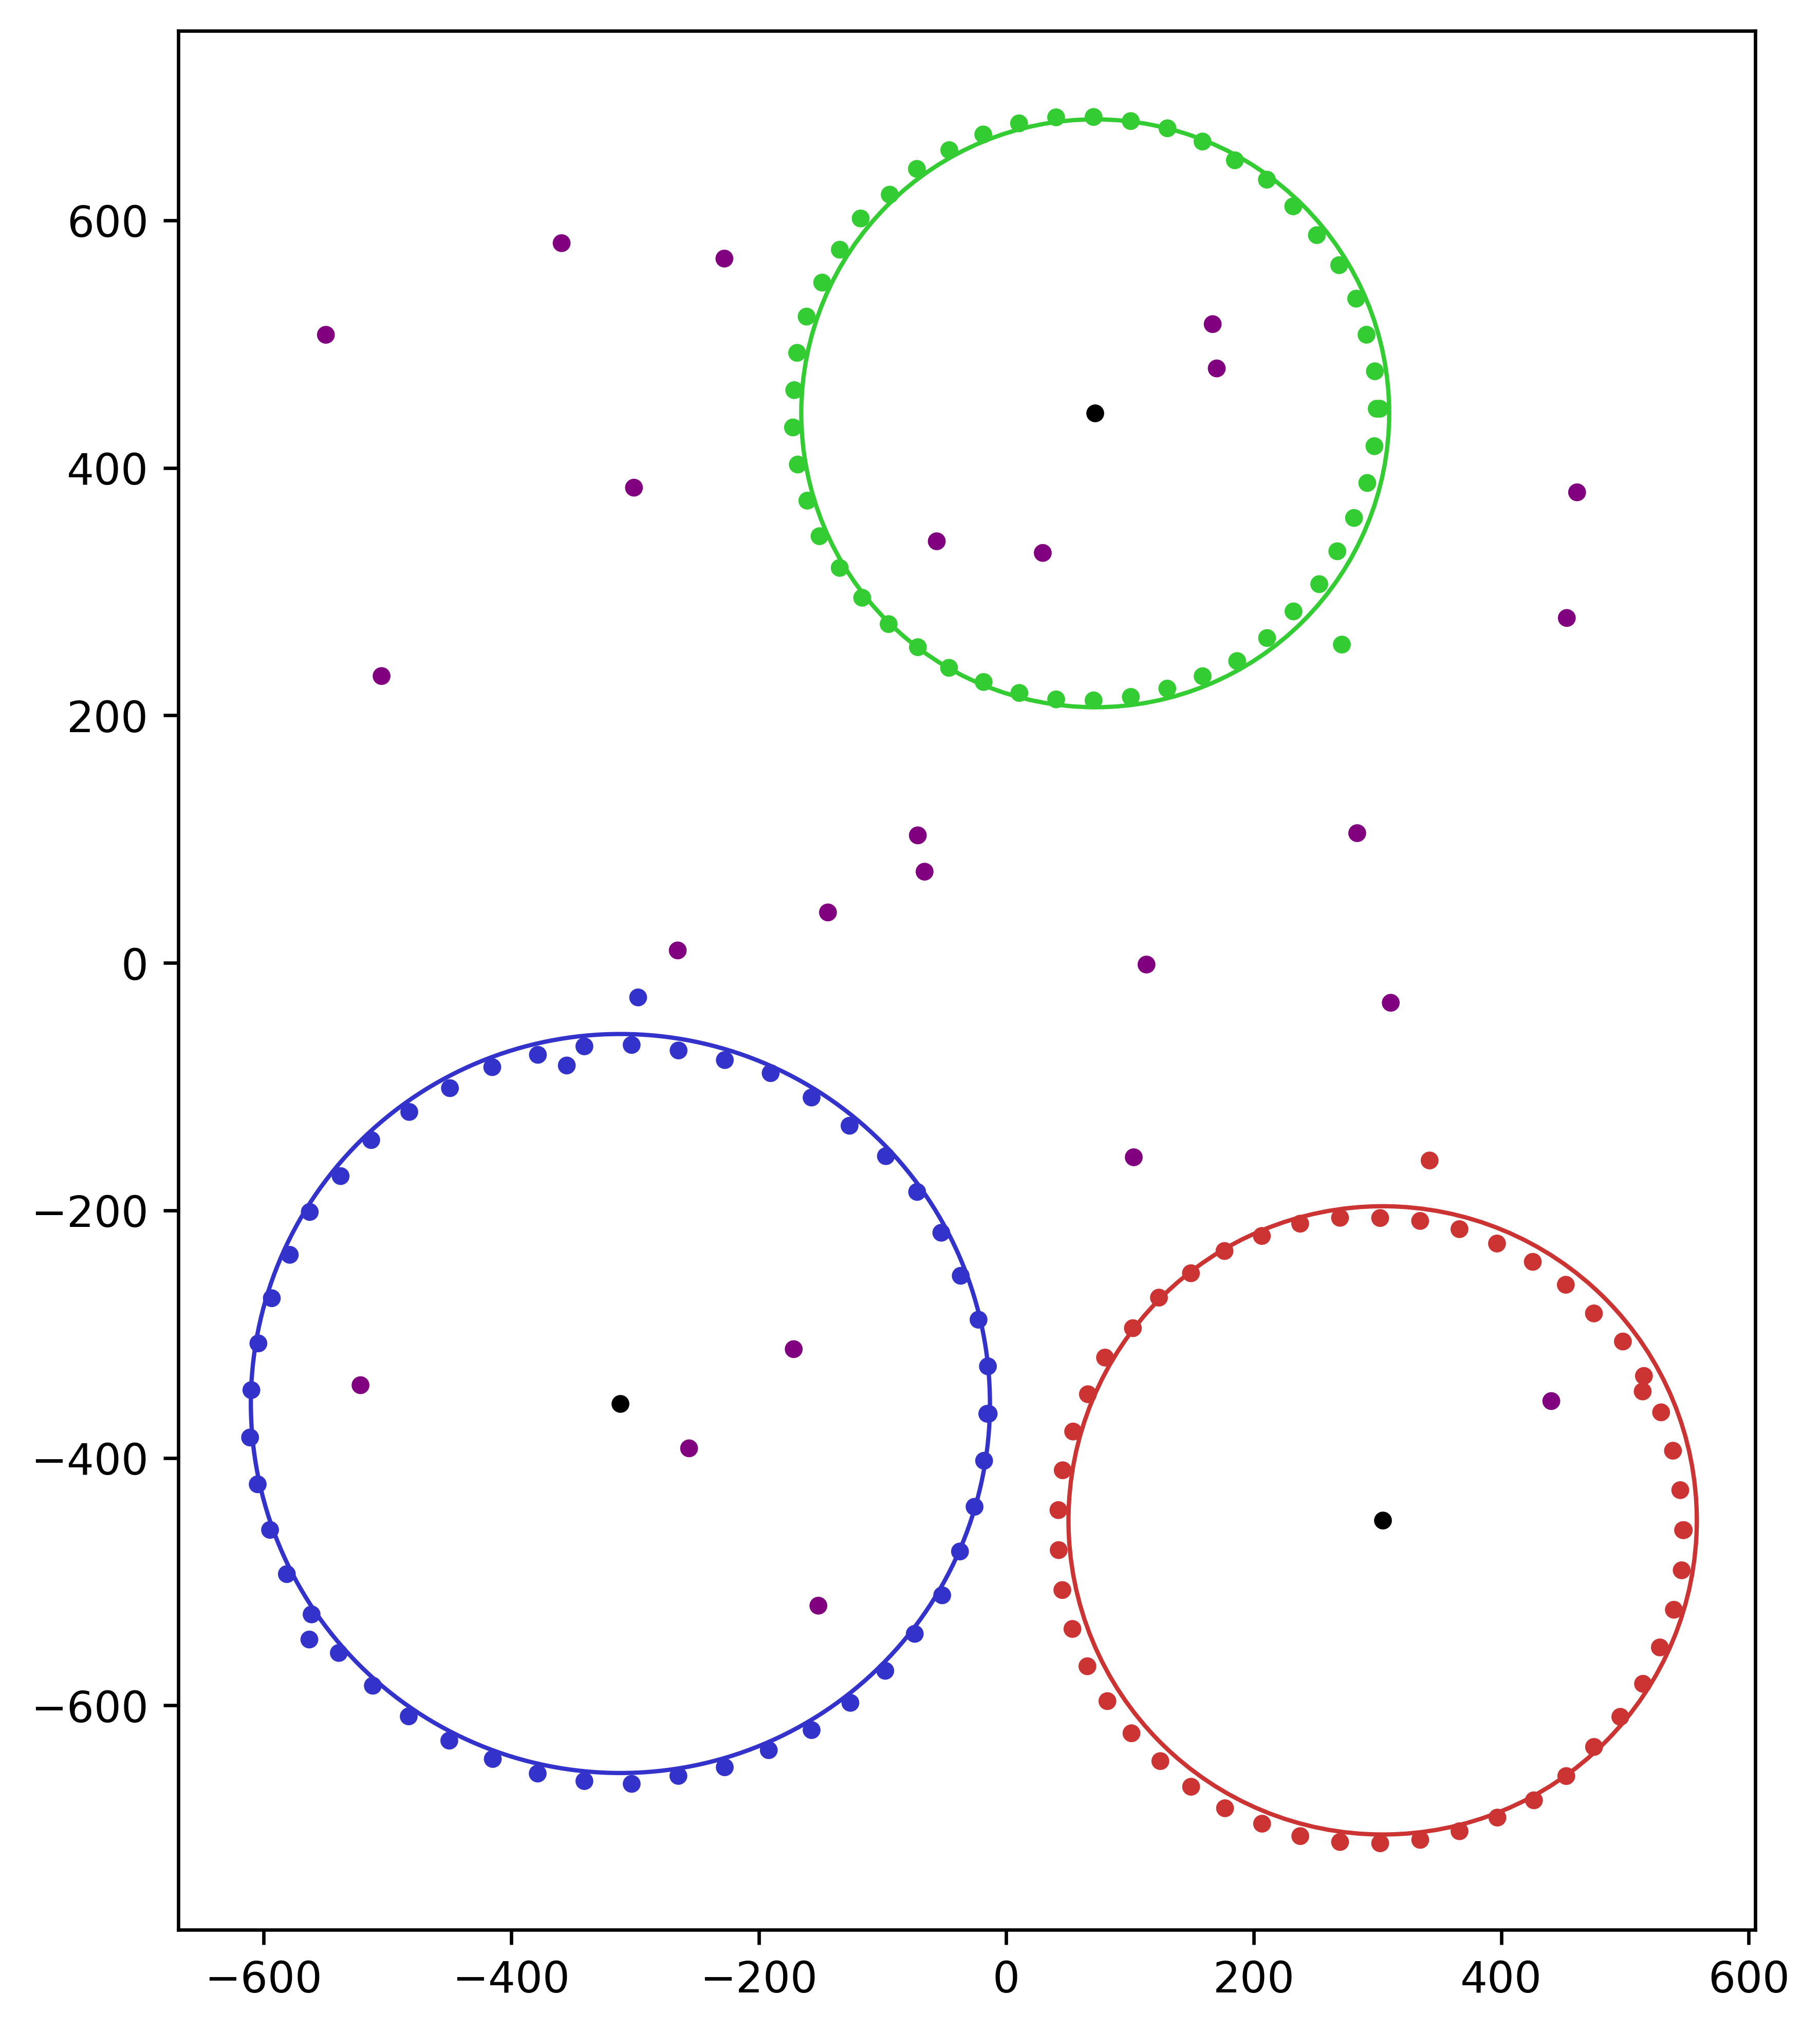

In [39]:
# high res plt
plt.rcParams["figure.dpi"] = 600
# set size
plt.rcParams["figure.figsize"] = (8, 8)
# Assuming random_circles and random_noise are defined functions
# that generate the necessary data

# Generate circles and noise data
EXCENTRIC = np.array([[-600, -600], [-600, 600], [600, -600], [600, 600]])
CONCENTRIC = np.array([[0, 0], [0, 0], [0, 0], [0, 0]])
EXCENTRIC_CLOSE = np.array(
    [[-100, -100], [-100, 100], [100, -100], [100, 100]])
center_delims = EXCENTRIC
center_delims_noise = EXCENTRIC
minmax_radius = np.array([100, 400])
n_rings = 3
circles = random_circles(center_delims, minmax_radius, 50, n_rings, noise=1)

# Generate additional noise
noise = random_noise(center_delims_noise, 30)

# Combine circles and noise
circles = np.concatenate([circles, noise])


# Fit the clustering model
model = NoisyRingsClustering(
    n_rings=n_rings,
    q=1.3,
    convergence_eps=0,
    max_iters=3300,
    noise_distance_threshold=50,
    apply_noise_removal=True,
    datadist="random"
)
model.fit(circles)

# mask = model.prune_noise(threshold=1.5, reestimate_centers_and_radii=False)
# Get the clustering results
# Get the clustering results
radii, centers, memberships = model.get_labels()

# Define distinct vibrant colors for each ring
vibrant_colors = get_vibrant_colors(n_rings)
# Ensure we have as many vibrant colors as we have rings
if len(vibrant_colors) < n_rings:
    raise ValueError(
        "Not enough distinct vibrant colors for the number of rings")
fig = plot_results(circles, radii, centers, memberships,
                   vibrant_colors, show_noise=True)

In [41]:
NAME = "noise_bg"
save_experiment(model, data=circles, name=NAME)

AttributeError: 'NoisyRingsClustering' object has no attribute 'noise_entropy_threshold'

In [40]:
import matplotlib


def save_plot_to_tikz(name):
    old_backend = matplotlib.get_backend()
    matplotlib.use("pgf")
    fig.savefig(f"{name}.pgf")
    matplotlib.use(old_backend)


save_plot_to_tikz(NAME)

   ---------------------------------------- 0.0/54.2 kB ? eta -:--:--
   ------- -------------------------------- 10.2/54.2 kB ? eta -:--:--
   ---------------------------------------- 54.2/54.2 kB 697.0 kB/s eta 0:00:00


DEPRECATION: Loading egg at c:\users\dagom\anaconda3\envs\pytorch\lib\site-packages\huggingface_hub-0.22.0rc1-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
